# Example usage

To use `ucell` in a project:

In [1]:
import ucell
import scanpy as sc
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
print(ucell.__version__)

0.1


Load the PBMC3K dataset.

/home/max/Desktop/ucell/.venv/lib64/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1207: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(values):
/home/max/Desktop/ucell/.venv/lib64/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1216: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/max/Desktop/ucell/.venv/lib64/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


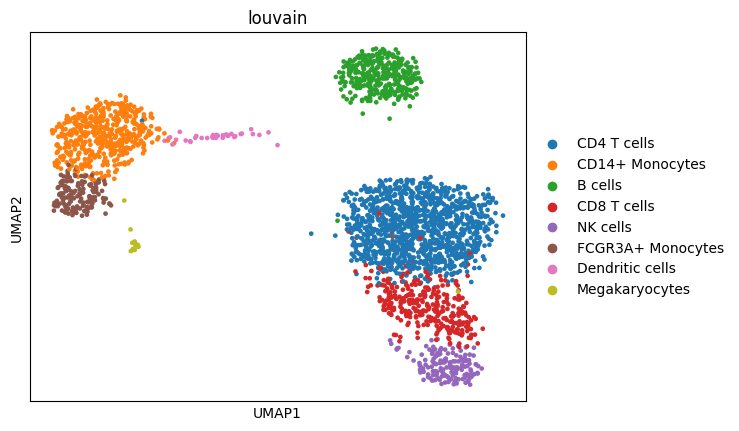

In [8]:
adata = sc.datasets.pbmc3k_processed()
sc.pl.umap(adata=adata, color='louvain')

## UCell

Define gene signatures as a dictionary of gene signatures where keys are signature names
and values are lists of gene names. Genes can have a direction as indicated by the trailing minus or plus sign.
Genes that don't exist in the AnnData object, will be filtered out.

`add_scores` add the gene scores directly to `adata.obs`, whereas `calc_scores` returns a `pd.DataFrame` with the scores for each observation.

In [16]:
# set the warning level do default again, to see which genes are removed.
warnings.filterwarnings('default')

signatures = {
    "T cell": ['CD3E', 'CD4', 'CD8A', 'CD19-'],
    "CD4 cell": ['CD3E', 'CD4', 'CD8A-', 'CD19-', 'IL7R'],
    "CD8 cell": ['CD3E', 'CD4-', 'CD8A+', 'CD19-', 'IL7R-', 'GZMB', 'NCAM1-', 'FCGR3A-'],
    "B cells": ['CD19', 'CD3E-', 'FAKE GENE', 'CD37']
}

ucell.add_scores(adata, signatures=signatures, maxRank=1000)

/home/max/Desktop/ucell/.venv/lib64/python3.11/site-packages/ucell/ucell.py:29: UserWarning: Some genes were not found in signature: B cells: ['FAKE GENE']. Missing genes will be removed from the list.
  signatures = __check_signatures(signatures=signatures, indices=m.columns)


/home/max/Desktop/ucell/.venv/lib64/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1207: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(values):


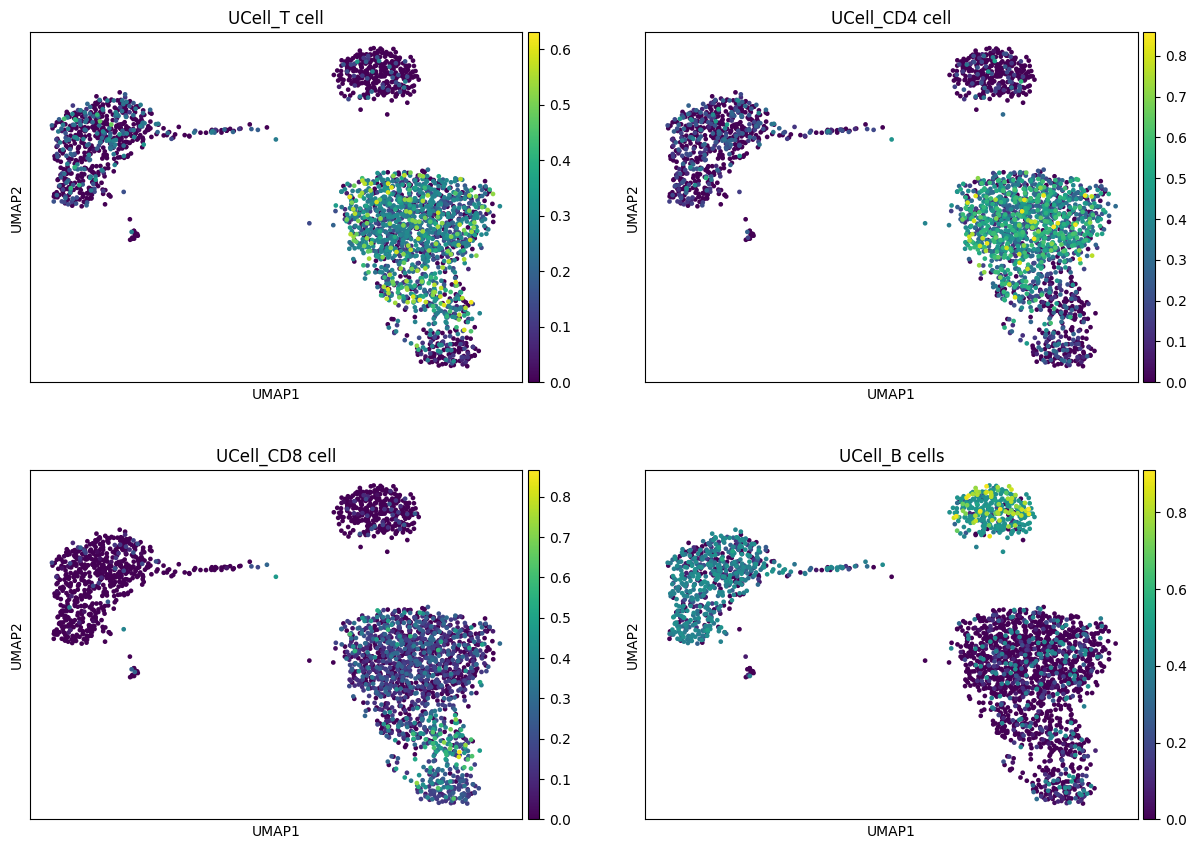

In [17]:
sc.pl.umap(
    adata,
    color=["UCell_" + k for k in signatures.keys()],
    ncols=2
)